In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('k_circles_null.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NaN


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
Item_Size                    6137
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
Item_Size                    72.005163
dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

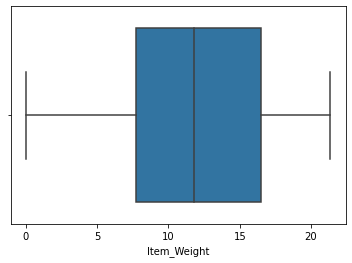

In [8]:
sns.boxplot(x='Item_Weight', data=df)

In [ ]:
# no. of presence of outliers . It can bee replaced with mean 

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NaN


<AxesSubplot:xlabel='Item_Weight'>

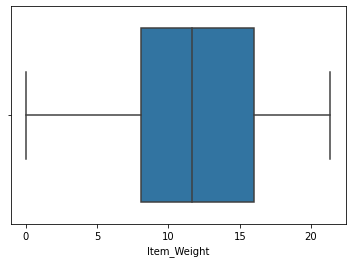

In [11]:
sns.boxplot(x='Item_Weight',data=df)

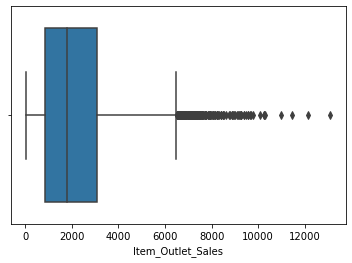

In [12]:
# outlier treatement 
sns.boxplot(data=df,x='Item_Outlet_Sales')
plt.show()

In [13]:
q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
print(ll,ul)

-2566.3261 6501.8699


In [14]:
outliers = df[(df['Item_Outlet_Sales']<ll) | (df['Item_Outlet_Sales']>ul)]
outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Size
43,FDC02,21.35000,Low Fat,0.069103,Canned,259.9,OUT018,2009,Medium,Tier 2,Supermarket Type2,6768.5228,12.4,NaN
130,FDY25,0.00000,Low Fat,0.033810,Canned,180.6,OUT027,1985,Medium,Tier 2,Supermarket Type3,7968.2944,14.7,NaN
132,NCR53,0.00000,Low Fat,0.144338,Health and Hygiene,224.4,OUT027,1985,Medium,Tier 2,Supermarket Type3,6976.2524,14.3,NaN
145,FDP16,18.60000,Low Fat,0.039356,Frozen Foods,246.4,OUT049,1999,Medium,Tier 2,Supermarket Type1,7370.4060,12.8,NaN
203,FDI24,11.67674,Low Fat,0.078362,Baking Goods,177.9,OUT027,1985,Medium,Tier 2,Supermarket Type3,6704.6060,13.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20000,Low Fat,0.035967,Fruits and Vegetables,260.3,OUT049,1999,Medium,Tier 2,Supermarket Type1,7549.5062,13.6,1.0
8329,NCQ06,0.00000,Low Fat,0.041622,Household,253.6,OUT027,1985,Medium,Tier 2,Supermarket Type3,6630.0364,14.6,2.0
8350,NCE18,10.00000,Low Fat,0.021421,Household,248.4,OUT035,2004,Small,Tier1,Supermarket Type1,7240.5750,13.5,0.0
8447,FDS26,20.35000,Low Fat,0.089975,Dairy,261.7,OUT017,2007,NaN,NaN,Supermarket Type1,7588.1226,14.4,3.0


In [15]:
df_no_outliers = df[(df['Item_Outlet_Sales']>ll) & (df['Item_Outlet_Sales']<ul)]
df_no_outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Size
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,NaN
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,NaN
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,NaN
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,NaN
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1,4.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2,4.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2,0.0


In [ ]:
# Feature enginerring 

In [16]:
df['no_of_years'] = 2021-df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Size,no_of_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,NaN,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,NaN,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,NaN,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,NaN,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NaN,34


In [17]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:
non_eatables = ['Household','Health and Hygiene','Others']

def func_eatables(item):
    if item in non_eatables:
        return 'non_eatables'
    else:
        return 'eatables'
    
df['Eatables'] = df['Item_Type'].apply(func_eatables)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Size,no_of_years,Eatables
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,NaN,22,eatables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,NaN,12,eatables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,NaN,22,eatables
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,NaN,23,eatables
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,NaN,34,non_eatables


In [19]:
# train test split 
from sklearn. model_selection import train_test_split 

In [21]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
x = df1.drop(columns='tip') 
y = df1['tip']  

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.shape

(195, 6)

In [27]:
y_train.shape

(195,)

In [28]:
x_test.shape

(49, 6)

In [29]:
y_test.shape

(49,)